In [ ]:
print("test")

test


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Text: 고생 끝에 피는 꽃, Probability: 0.3938472367771731
Text: 버티편 지나가고 , 지나가면 오더라, Probability: 0.36582861186682447
Text: 좋음 달들이., Probability: 0.31537779860663845
Text: 선이 너름 괴롭치더라도 슬거말고, Probability: 0.076556903117281
Text: 불멩이 너름찾아와도 주저앉지 마과:, Probability: 0.37715815785601103
Text: 거센 바람어 /들리고, Probability: 0.1858958719686812
Text: 차가운 뵈어 틈뼈 젖고, Probability: 0.049181572193606124
Text: 또M운 햇살을 견드야파, Probability: 0.008497981575947113
Text: 마침내 싸시 돈고, Probability: 0.6895575093908123
Text: I렇거 학경제 피어난 꽂예는, Probability: 0.025615843049200247
Text: 본명 열매라는 대가가 있다:, Probability: 0.2824764730981021
Text: 지금 낙게거 찾아운, Probability: 0.24694496355941353
Text: 스름#숙과 불행은, Probability: 0.011159739398736017
Text: 희망과 해복스로 가능 과정이다:, Probability: 0.2874879748593092
Text: 비록 진금은 어두운 흙 속 씨앗일 뿐이지만, Probability: 0.1923891929860155
Text: 머칠요앙 당신은 분명, Probability: 0.014179232773501362
Text: 아름다운' 꽂들 '피출 사람이다., Probability: 0.0982704602519598
Text: 조금만 버터과., Probability: 0.515372482922838
Text: 거의 다 와으니까., Probabil

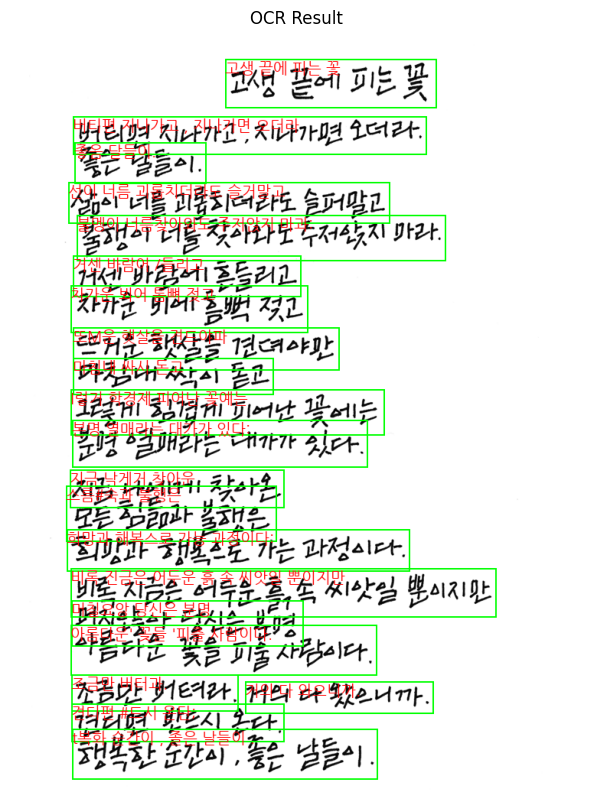

In [2]:
import easyocr
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw, ImageFont

# EasyOCR 리더 초기화 (예: 영어와 한국어 지원)
reader = easyocr.Reader(['en', 'ko'] , gpu=True)

# 이미지 파일 경로
img_path = 'ts_png.png'

# 이미지 읽기
result = reader.readtext(img_path)

# 결과 출력
for (bbox, text, prob) in result:
    print(f'Text: {text}, Probability: {prob}')

# PIL 이미지를 사용하여 이미지 로드
image = Image.open(img_path).convert("RGB")
draw = ImageDraw.Draw(image)

# 한글 폰트를 사용하여 텍스트 표시 (예: 'malgun.ttf' 폰트를 사용하는 경우)
# 시스템에 설치된 폰트를 사용할 수도 있습니다.
font_path = 'NanumGothic.ttf'
font = ImageFont.truetype(font_path, 20)

# 텍스트 박스 및 인식 결과 표시
for (bbox, text, prob) in result:
    # 텍스트 박스 좌표
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))
    # 박스 그리기
    draw.rectangle([top_left, bottom_right], outline=(0, 255, 0), width=2)
    # 텍스트 표시
    draw.text(top_left, text, font=font, fill=(255, 0, 0))

# 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('OCR Result')
plt.axis('off')

# 결과 이미지 저장
output_image_path = 'ocr_result.png'
plt.savefig(output_image_path, bbox_inches='tight')

plt.show()


In [ ]:
import easyocr
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# EasyOCR 리더 초기화 (예: 영어와 한국어 지원)
reader = easyocr.Reader(['en', 'ko'], gpu=True)

# 이미지 파일 경로
img_path = 'ts_png.png'

# 이미지 읽기
result = reader.readtext(img_path)

# 결과 출력
for (bbox, text, prob) in result:
    print(f'Text: {text}, Probability: {prob}')

# 텍스트 박스 합병 함수
def merge_text_boxes(results, threshold=10):
    merged_boxes = []
    current_box = results[0][0]
    for i in range(1, len(results)):
        next_box = results[i][0]
        # 텍스트 박스 사이의 거리가 일정 이하이면 합병
        if abs(next_box[0][1] - current_box[2][1]) < threshold:
            current_box = [
                (min(current_box[0][0], next_box[0][0]), min(current_box[0][1], next_box[0][1])),
                (max(current_box[1][0], next_box[1][0]), min(current_box[1][1], next_box[1][1])),
                (max(current_box[2][0], next_box[2][0]), max(current_box[2][1], next_box[2][1])),
                (min(current_box[3][0], next_box[3][0]), max(current_box[3][1], next_box[3][1]))
            ]
        else:
            merged_boxes.append(current_box)
            current_box = next_box
    merged_boxes.append(current_box)
    return merged_boxes

# PIL 이미지를 사용하여 이미지 로드
image = Image.open(img_path).convert("RGB")
draw = ImageDraw.Draw(image)

# 한글 폰트를 사용하여 텍스트 표시 (예: 'NanumGothic.ttf' 폰트를 사용하는 경우)
# 시스템에 설치된 폰트를 사용할 수도 있습니다.
font_path = 'NanumGothic.ttf'
font = ImageFont.truetype(font_path, 20)

# 합병된 텍스트 박스 및 인식 결과 표시
merged_boxes = merge_text_boxes(result)

for bbox in merged_boxes:
    # 텍스트 박스 좌표
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))
    # 박스 그리기
    draw.rectangle([top_left, bottom_right], outline=(0, 255, 0), width=2)

# 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('OCR Result')
plt.axis('off')

# 결과 이미지 저장
output_image_path = 'ocr_result.png'
plt.savefig(output_image_path, bbox_inches='tight')

plt.show()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |███████████████████████████████████████-----------| 79.7% Complete